In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
print(torch.__version__)

2.7.0+cpu


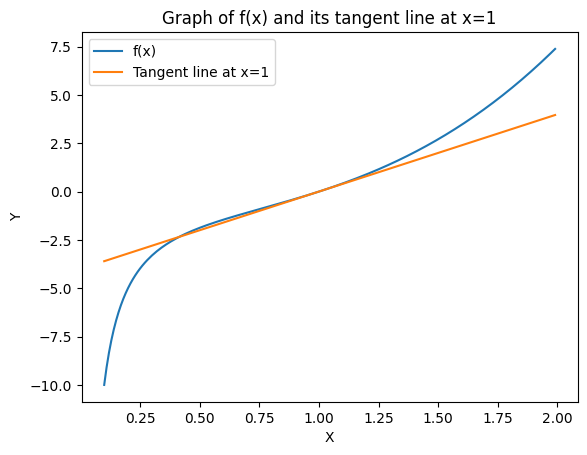

In [2]:
# test 1
# 定义函数
def f(x):
    return x**3 - 1/x

# 定义x=point的切线
def f_tangent(f, x, point):
    h = 1e-4
    grad = (f(point+h) - f(point)) / h
    return grad*(x-point) + f(point)

# 绘制函数图像和切线
x = np.arange(0.1, 2.0, 0.01)
y = f(x)
y_tangent = f_tangent(f, x=x, point=1)
plt.plot(x,y, label='f(x)')
plt.plot(x,y_tangent, label='Tangent line at x=1')
plt.legend()
plt.title('Graph of f(x) and its tangent line at x=1')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [3]:
# test 2
x = torch.arange(2.0, requires_grad=True)  
# print(x)  # tensor([0., 1.], requires_grad=True)
y = 3*x[0]**2 + 5*torch.exp(x[1])

y.backward() # 计算梯度，并将其储存在x.grad中
print('f(x)的梯度：',x.grad)

f(x)的梯度： tensor([ 0.0000, 13.5914])


In [4]:
# test 3
x = torch.arange(4.0, requires_grad=True)
y = torch.dot(x,x).sqrt()
y.backward()
print('f(x)的梯度：', x.grad)
print('验证结果：',x.grad == x/(torch.dot(x, x).sqrt()))

f(x)的梯度： tensor([0.0000, 0.2673, 0.5345, 0.8018])
验证结果： tensor([True, True, True, True])


### test 4
$u = f(x,y,z), x=x(a,b), y=y(a,b), z=z(a,b)$

$\frac{\partial f}{\partial a} = \frac{\partial f}{\partial u} \frac{\partial u}{\partial x} \frac{\partial x}{\partial a} + \frac{\partial f}{\partial u} \frac{\partial u}{\partial y} \frac{\partial y}{\partial a} + \frac{\partial f}{\partial u} \frac{\partial u}{\partial z} \frac{\partial z}{\partial a}$

$\frac{\partial f}{\partial b} = \frac{\partial f}{\partial u} \frac{\partial u}{\partial x} \frac{\partial x}{\partial b} + \frac{\partial f}{\partial u} \frac{\partial u}{\partial y} \frac{\partial y}{\partial b} + \frac{\partial f}{\partial u} \frac{\partial u}{\partial z} \frac{\partial z}{\partial b}$